# Setup Environment

If you are working on this assignment using Google Colab, please execute the codes below.

Alternatively, you can also do this assignment using a local anaconda environment (or a Python virtualenv). Please clone the GitHub repo by running `git clone https://github.com/Berkeley-CS182/cs182fa25_public.git` cd to `cs182fa25_public/homework/hw00/code/` and refer to `README.md` for further details.

In [6]:
#@title Mount your Google Drive

import os
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [7]:
#@title Set up mount symlink
REPO_NAME = 'cs182fa25_public'

DRIVE_PATH = f'/content/gdrive/My\ Drive/{REPO_NAME}'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = f'/content/{REPO_NAME}'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

�����﷨����ȷ��
'ln' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [8]:
#@title Install dependencies

!pip install numpy imageio matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\gutia\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [9]:
#@title Clone homework repo

%cd $SYM_PATH
if not os.path.exists(REPO_NAME):
  !git clone https://github.com/Berkeley-CS182/cs182fa25_public.git
%cd cs182fa25_public/hw00/code

[WinError 3] 系统找不到指定的路径。: '/content/cs182fa25_public'
d:\GTY\work\3-1\cs182_DL\hw0code
d:\GTY\work\3-1\cs182_DL\hw0code\cs182fa25_public\hw00\code


In [10]:
#@title Download datasets

%cd deeplearning/datasets/
!bash ./get_datasets.sh
%cd ../..

d:\GTY\work\3-1\cs182_DL\hw0code\cs182fa25_public\hw00\code\deeplearning\datasets
d:\GTY\work\3-1\cs182_DL\hw0code\cs182fa25_public\hw00\code


'bash' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


##### If you're on MacOS and the above cell had a ``wget: command not found error``, run the below cell and then rerun the above cell.

In [11]:
!brew install wget

'brew' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [12]:
#@title Configure Jupyter Notebook

import matplotlib
%matplotlib inline

from importlib import reload
reload(matplotlib)

<module 'matplotlib' from 'd:\\Anaconda\\envs\\cs182hw1\\lib\\site-packages\\matplotlib\\__init__.py'>

# Fully-Connected Neural Nets

In this notebook we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
  
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

In [ ]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.fc_net import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from deeplearning.solver import Solver

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [13]:
# Lddoad the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
    print('%s: ' % k, v.shape)

deeplearning/datasets/cifar-10-batches-py\data_batch_1
deeplearning/datasets/cifar-10-batches-py\data_batch_2
deeplearning/datasets/cifar-10-batches-py\data_batch_3
deeplearning/datasets/cifar-10-batches-py\data_batch_4
deeplearning/datasets/cifar-10-batches-py\data_batch_5
deeplearning/datasets/cifar-10-batches-py\test_batch
X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


# Affine layer: forward
Open the file `deeplearning/layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [ ]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769848888397517e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [ ]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)
# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  6.604932069395492e-10
dw error:  4.098444646283633e-11
db error:  4.259697395026858e-12


# ReLU layer: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [ ]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU layer: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking. Note that the ReLU activation is not differentiable at 0, but typically we don't worry about this and simply assign either 0 or 1 as the derivative by convention.

In [ ]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756258728549554e-12


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `deeplearning/layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [ ]:
from deeplearning.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print('Testing affine_relu_forward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward:
dx error:  9.077697871629011e-10
dw error:  3.768039244687093e-10
db error:  7.826683520444086e-12


# Loss layers: Softmax and SVM
Here we provide two loss functions that we will use to train our deep neural networks. You should understand how they work by looking at the implementations in `deeplearning/layers.py`.

You can make sure that the implementations are correct by running the following:

In [ ]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be 1e-9
print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  9.00247078734275
dx error:  1.4021566006651672e-09

Testing softmax_loss:
loss:  2.302832622619826
dx error:  8.532924084122473e-09


# Two-layer network

Open the file `deeplearning/classifiers/fc_net.py` and complete the implementation of the `TwoLayerNet` class. This class will serve as a model for the other networks you will implement in this assignment, so read through it to make sure you understand the API. Run the cell below to test your implementation.

In [ ]:
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-2
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print ('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print ('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print ('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print ('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 1.83e-08
W2 relative error: 3.37e-10
b1 relative error: 8.01e-09
b2 relative error: 2.53e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.35e-08
b2 relative error: 1.97e-09


# Solver
Following a modular design, for this assignment we have split the logic for training models into a separate class from the models themselves.

Open the file `deeplearning/solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set.

In [ ]:
model = TwoLayerNet()
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################
solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                    'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=8,
                batch_size=128,
                print_every=100,
                verbose=True)

solver.train()

val_acc = solver.best_val_acc
print(f'Best validation accuracy: {val_acc * 100:.2f}%')

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 3056) loss: 2.303468
(Epoch 0 / 8) train acc: 0.171000; val_acc: 0.147000
(Iteration 101 / 3056) loss: 1.776339
(Iteration 201 / 3056) loss: 1.628696
(Iteration 301 / 3056) loss: 1.637078
(Epoch 1 / 8) train acc: 0.451000; val_acc: 0.422000
(Iteration 401 / 3056) loss: 1.547135
(Iteration 501 / 3056) loss: 1.538880
(Iteration 601 / 3056) loss: 1.500362
(Iteration 701 / 3056) loss: 1.422625
(Epoch 2 / 8) train acc: 0.476000; val_acc: 0.450000
(Iteration 801 / 3056) loss: 1.416056
(Iteration 901 / 3056) loss: 1.354733
(Iteration 1001 / 3056) loss: 1.353700
(Iteration 1101 / 3056) loss: 1.398096
(Epoch 3 / 8) train acc: 0.496000; val_acc: 0.484000
(Iteration 1201 / 3056) loss: 1.356946
(Iteration 1301 / 3056) loss: 1.221416
(Iteration 1401 / 3056) loss: 1.524489
(Iteration 1501 / 3056) loss: 1.282674
(Epoch 4 / 8) train acc: 0.554000; val_acc: 0.508000
(Iteration 1601 / 3056) loss: 1.382094
(Iteration 1701 / 3056) loss: 1.311863
(Iteration 1801 / 3056) loss: 1.288400
(Itera

C:\Users\gutia\AppData\Local\Temp\ipykernel_27336\1723583778.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)


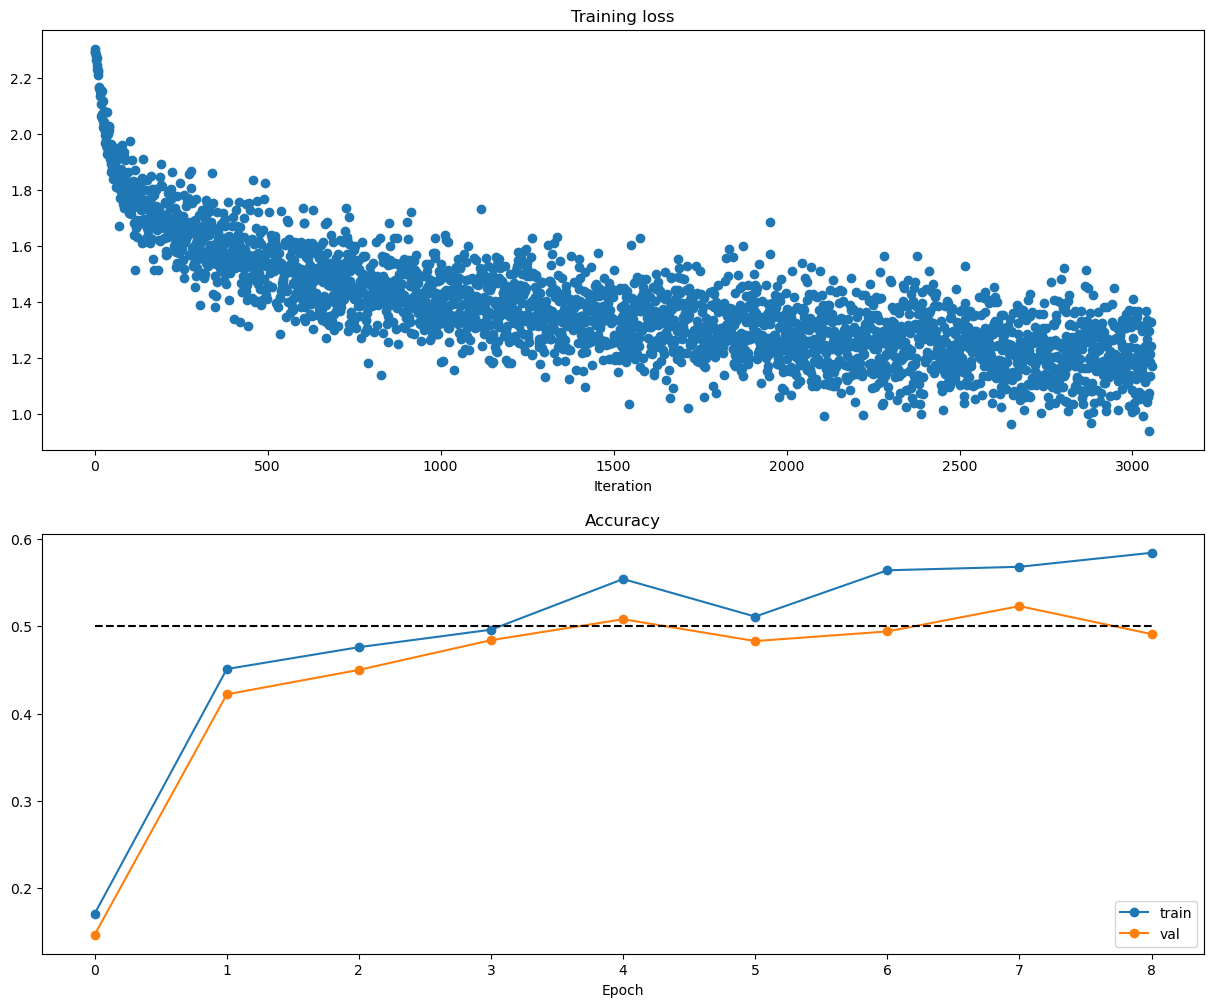

In [ ]:
# Run this cell to visualize training loss and train / val accuracy, and save the log file of the
# experiment for submission.

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network
Next you will implement a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `deeplearning/classifiers/fc_net.py`.

Implement the initialization, the forward pass, and the backward pass. For the moment don't worry about implementing dropout or batch normalization; we will add those features soon.

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors around 1e-6 or less.

In [2]:
import numpy as np
from deeplearning.classifiers.fc_net import FullyConnectedNet
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.fc_net import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from deeplearning.solver import Solver

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print ('Running check with reg = ', reg)
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                              reg=reg, weight_scale=5e-2, dtype=np.float64)

    loss, grads = model.loss(X, y)
    print ('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.302789637455942
W1 relative error: 2.79e-07
W2 relative error: 5.06e-07
W3 relative error: 3.96e-07
b1 relative error: 1.44e-08
b2 relative error: 5.33e-09
b3 relative error: 1.54e-10
Running check with reg =  3.14
Initial loss:  6.751148586180987
W1 relative error: 1.41e-08
W2 relative error: 7.35e-08
W3 relative error: 9.11e-09
b1 relative error: 3.44e-08
b2 relative error: 9.02e-09
b3 relative error: 1.63e-10


As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. You will need to tweak the learning rate and initialization scale, but you should be able to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 3.121146
(Epoch 0 / 20) train acc: 0.240000; val_acc: 0.117000
(Epoch 1 / 20) train acc: 0.260000; val_acc: 0.129000
(Epoch 2 / 20) train acc: 0.380000; val_acc: 0.140000
(Epoch 3 / 20) train acc: 0.460000; val_acc: 0.156000
(Epoch 4 / 20) train acc: 0.580000; val_acc: 0.157000
(Epoch 5 / 20) train acc: 0.600000; val_acc: 0.159000
(Iteration 11 / 40) loss: 1.475020
(Epoch 6 / 20) train acc: 0.700000; val_acc: 0.178000
(Epoch 7 / 20) train acc: 0.800000; val_acc: 0.177000
(Epoch 8 / 20) train acc: 0.780000; val_acc: 0.175000
(Epoch 9 / 20) train acc: 0.820000; val_acc: 0.198000
(Epoch 10 / 20) train acc: 0.880000; val_acc: 0.176000
(Iteration 21 / 40) loss: 0.893258
(Epoch 11 / 20) train acc: 0.880000; val_acc: 0.174000
(Epoch 12 / 20) train acc: 0.920000; val_acc: 0.171000
(Epoch 13 / 20) train acc: 0.980000; val_acc: 0.180000
(Epoch 14 / 20) train acc: 0.980000; val_acc: 0.177000
(Epoch 15 / 20) train acc: 0.980000; val_acc: 0.181000
(Iteration 31 / 40) loss: 

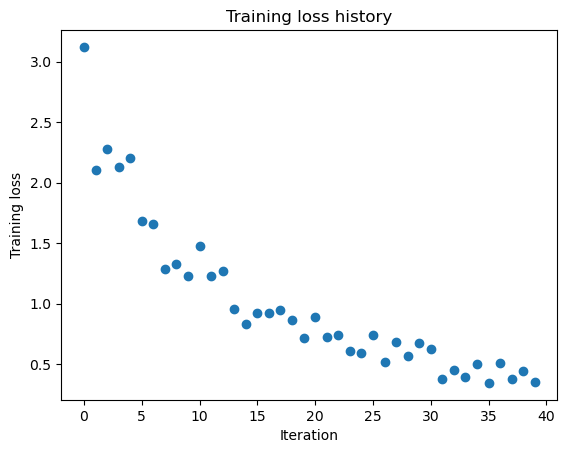

In [46]:
# TODO: Use a three-layer Net to overfit 50 training examples.
num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

learning_rate = 1e-3  
weight_scale = 2e-2  

############################################################################
############################################################################
############################################################################
#                             END OF YOUR CODE                             #
############################################################################

model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 30.951634
(Epoch 0 / 20) train acc: 0.200000; val_acc: 0.123000
(Epoch 1 / 20) train acc: 0.300000; val_acc: 0.108000
(Epoch 2 / 20) train acc: 0.400000; val_acc: 0.115000
(Epoch 3 / 20) train acc: 0.520000; val_acc: 0.127000
(Epoch 4 / 20) train acc: 0.680000; val_acc: 0.126000
(Epoch 5 / 20) train acc: 0.720000; val_acc: 0.135000
(Iteration 11 / 40) loss: 1.403698
(Epoch 6 / 20) train acc: 0.920000; val_acc: 0.138000
(Epoch 7 / 20) train acc: 0.880000; val_acc: 0.159000
(Epoch 8 / 20) train acc: 0.940000; val_acc: 0.149000
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.145000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.148000
(Iteration 21 / 40) loss: 0.002538
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.148000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.148000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.149000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.149000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.149000
(Iteration 31 / 40) loss:

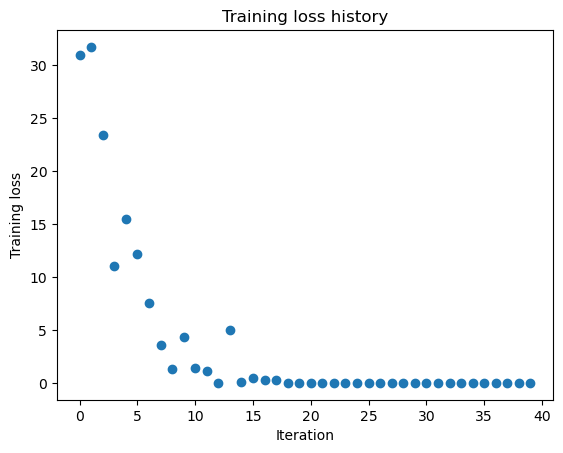

In [45]:
## TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
learning_rate = 1e-3  
weight_scale = 8e-2
############################################################################
# TODO: Tune these parameters to get 100% train accuracy within 20 epochs. #
############################################################################
############################################################################
#                             END OF YOUR CODE                             #
############################################################################

model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Question: 
Did you notice anything about the comparative difficulty of training the three-layer net vs training the five layer net?

**Please include your response in the written assignment submission.**

It's more difficult to adjust the learning rate and weight scale for the five layer net. I tried more times in training the 5-layer network to let it have 100% training accuracy. 